In [2]:
# playing with redshifts and group data
import numpy as np
import h5py
import hdf5plugin
import pandas as pd

# Reading Snapshots
# snapshot name
snapshot = '../Data/Sims/IllustrisTNG/L25n256/CV/CV_0/snap_033.hdf5'

# open file
f = h5py.File(snapshot, 'r')

# read different attributes of the header
BoxSize      = f['Header'].attrs[u'BoxSize']/1e3 #Mpc/h
redshift     = f['Header'].attrs[u'Redshift']
redshift

2.220446049250313e-16

In [4]:
subhalo = '../Data/Sims/IllustrisTNG/L25n256/CV/CV_1/fof_subhalo_tab_029.hdf5'

# open file
f = h5py.File(subhalo, 'r')

# read different attributes of the header
BoxSize      = f['Header'].attrs[u'BoxSize']/1e3 #Mpc/h
redshift     = f['Header'].attrs[u'Redshift']
redshift

0.21011695248665796

In [25]:
cat = '../Data/FOF_Subfind/IllustrisTNG/CV/CV_0/fof_subhalo_tab_031.hdf5'
# open file
f = h5py.File(cat, 'r')

# read different attributes of the header
BoxSize      = f['Header'].attrs[u'BoxSize']/1e3 #Mpc/h
redshift     = f['Header'].attrs[u'Redshift']
print('BoxSize: ', BoxSize)
print('redshift: ', redshift)


BoxSize:  25.0
redshift:  0.10005315893672084


In [28]:
Vphys = int(BoxSize)**3
Vphys

15625

In [32]:
Vcom = Vphys*((1+redshift)**3)
Vcom

20799.890254153535

In [13]:
f['Group'].keys()

<KeysViewHDF5 ['GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200']>

In [11]:
f.keys()

<KeysViewHDF5 ['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']>

In [12]:
len(f['Subhalo'].keys()) #these are the ROWS, the columns are the galaxies?

50

In [55]:
f['Subhalo'].keys()


<KeysViewHDF5 ['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHalfRad', '

In [43]:
f['Subhalo']['SubhaloMassType'][:,4]*1e10

array([4.1841141e+11, 2.2969973e+10, 1.5962372e+10, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [44]:
df_subh = pd.DataFrame(f['Subhalo'].values())
df_subh

,0,1,2,3,4,5,6,7,8,9,...,17395,17396,17397,17398,17399,17400,17401,17402,17403,17404
0,0.173436,0.001922,0.007895,0.004394,0.000117,0.012809,0.00214,0.000085,0.000234,0.000249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00004,0.000792,0.000422,0.010645,0.000006,0.0,0.0,0.000004,0.0,0.000042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001211,0.00038,0.002129,0.001542,0.002825,0.0,0.00087,0.002885,0.007563,0.000657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,0.00252,0.001628,0.001163,NaN,0.0,0.000268,0.001223,0.003263,0.003266,...,0.0,0.0,0.000956,0.0,0.0,0.0,0.0,0.001159,0.0,0.0
4,"[642.3302, 17528.293, 8957.883]","[320.42828, 17208.658, 8485.696]","[921.83215, 17993.852, 9695.096]","[794.5636, 17968.06, 9396.872]","[24624.152, 17380.557, 8008.7676]","[612.6284, 17569.605, 8981.767]","[978.91907, 17386.795, 9210.547]","[24844.191, 17183.656, 8361.67]","[701.48944, 18056.773, 9806.633]","[491.6469, 17334.447, 8497.619]",...,"[21597.0, 23515.977, 2266.8086]","[23169.803, 23029.309, 24616.195]","[22362.92, 19831.963, 1385.1288]","[522.0944, 21705.232, 891.914]","[395.22552, 21878.875, 849.6094]","[23679.535, 22506.02, 2668.3364]","[436.3405, 21464.246, 22568.928]","[1209.3511, 19661.459, 22587.773]","[1551.9961, 19579.14, 1192.5409]","[1680.3634, 20493.867, 21271.807]"
5,"[0.7517838, 0.24416605, 0.00039793047, 0.00013...","[0.7128549, 0.25809357, 0.0033259115, 0.000978...","[0.71041316, 0.25832623, 0.003422539, 0.001127...","[0.72717744, 0.25318936, 0.0021598418, 0.00064...","[0.7460067, 0.24427864, 0.0009814855, 0.000303...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.73095936, 0.25097486, 0.0019171583, 0.00067...","[0.75080645, 0.24353306, 0.00049414043, 0.0001...","[0.73165786, 0.25152314, 0.0017574613, 0.00063...","[0.740675, 0.24710038, 0.0012507057, 0.0003844...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,"[0.7478921, 0.24602287, 0.00055628386, 0.00020...","[0.7021294, 0.2610517, 0.0042448505, 0.0012377...","[0.70999104, 0.25842232, 0.003461084, 0.001141...","[0.7229961, 0.25422204, 0.0025135942, 0.000753...","[0.7443041, 0.24458162, 0.001129892, 0.0003486...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7314593, 0.25061986, 0.0019418906, 0.000659...","[0.74737495, 0.24448295, 0.00071271247, 0.0002...","[0.7318125, 0.25151736, 0.00173676, 0.00062522...","[0.73825544, 0.24766043, 0.0014516469, 0.00044...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,"[0.7547233, 0.24270725, 0.00026344944, 8.45153...","[0.7019384, 0.26109663, 0.0042629247, 0.001242...","[0.70998055, 0.25841847, 0.0034628615, 0.00114...","[0.7223682, 0.2543556, 0.0025694217, 0.0007704...","[0.75276864, 0.24299154, 0.00041475488, 0.0001...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7305908, 0.25110233, 0.0019431275, 0.000689...","[0.7547062, 0.2424084, 0.00024868114, 8.30049e...","[0.7316945, 0.25151274, 0.0017545702, 0.000629...","[0.74033886, 0.24719557, 0.0012766938, 0.00039...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [45]:
df_group = pd.DataFrame(f['Group'].values())
df_group

,0,1,2,3,4,5,6,7,8,9,...,20113,20114,20115,20116,20117,20118,20119,20120,20121,20122
0,0.20663,0.079836,0.05617,0.127649,0.109033,0.117656,0.084885,0.078416,0.077067,0.034377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.011954,0.003562,0.000522,0.002369,0.00002,0.001824,0.001164,0.000101,0.000417,0.001046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[632.83276, 17528.031, 8953.758]","[6686.4956, 16561.943, 20745.863]","[5088.6514, 714.58966, 23100.11]","[16462.945, 13037.769, 2205.0242]","[15420.548, 15218.97, 2565.4326]","[4412.7017, 10136.958, 16304.943]","[5876.7593, 5508.0625, 21268.734]","[20284.725, 13715.652, 11732.316]","[5452.5293, 18851.895, 194.33325]","[14869.988, 12177.884, 20430.668]",...,"[22363.914, 19832.104, 1384.2458]","[522.1528, 21704.28, 892.7786]","[395.68628, 21877.402, 851.5589]","[23679.934, 22505.504, 2670.5303]","[436.40875, 21464.08, 22568.049]","[1209.2926, 19660.979, 22588.947]","[1551.5237, 19580.01, 1191.5503]","[1680.9493, 20494.69, 21269.87]","[4010.1719, 22336.967, 22771.074]","[3943.6655, 22466.562, 23178.422]"
3,0,222,349,480,619,730,831,940,1030,1106,...,17397,17398,17399,17400,17401,17402,17403,17404,-1,-1
4,"[0.7555763, 0.24226557, 0.00022288378, 7.07196...","[0.75555545, 0.2422804, 0.00022379689, 7.02418...","[0.7551789, 0.2425871, 0.00023560181, 7.581209...","[0.75420266, 0.24299659, 0.00029039843, 9.1209...","[0.75618964, 0.24193284, 0.00019048386, 6.0264...","[0.7529743, 0.24355645, 0.00036246248, 0.00011...","[0.75479215, 0.24267094, 0.0002594659, 8.13838...","[0.7551278, 0.2424532, 0.00024512495, 7.771727...","[0.754481, 0.24283084, 0.00027987242, 8.815278...","[0.75364894, 0.24320182, 0.00032469368, 0.0001...",...,"[0.76, 0.24, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10...","[0.7599826, 0.24000993, 5.567807e-07, 1.933149...","[0.75993747, 0.24003263, 1.5458367e-06, 6.2189...","[0.76, 0.24, 9.968657e-11, 9.968657e-11, 9.968...","[0.76, 0.24, 9.944681e-11, 9.944681e-11, 9.944...","[0.76, 0.24, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10...","[0.76, 0.24, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10...","[0.76, 0.24, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10...","[0.757592, 0.24120548, 0.0001269749, 3.97001e-...","[0.749712, 0.24483752, 0.00059001584, 0.000182..."
5,0.002158,0.002164,0.002234,0.002801,0.001877,0.003469,0.002537,0.002419,0.002688,0.003149,...,0.0,0.000007,0.00003,0.0,0.0,0.0,0.0,0.0,0.001203,0.00545
6,1163961,532026,468363,451327,429478,374217,371368,276284,272858,149881,...,32,32,32,32,32,32,32,32,32,32
7,"[421830, 678965, 0, 0, 63149, 17]","[162585, 336056, 0, 0, 33376, 9]","[149836, 278885, 0, 0, 39632, 10]","[126602, 293641, 0, 0, 31072, 12]","[117226, 285931, 0, 0, 26313, 8]","[96394, 247324, 0, 0, 30491, 8]","[107150, 239099, 0, 0, 25105, 14]","[74332, 183481, 0, 0, 18457, 14]","[66545, 187105, 0, 0, 19202, 6]","[48836, 89009, 0, 0, 12026, 10]",...,"[6, 26, 0, 0, 0, 0]","[2, 30, 0, 0, 0, 0]","[3, 29, 0, 0, 0, 0]","[7, 25, 0, 0, 0, 0]","[12, 20, 0, 0, 0, 0]","[4, 28, 0, 0, 0, 0]","[9, 23, 0, 0, 0, 0]","[8, 24, 0, 0, 0, 0]","[31, 1, 0, 0, 0, 0]","[31, 1, 0, 0, 0, 0]"
8,5027.734863,2424.931641,2042.677002,2103.106445,2035.543091,1759.888794,1716.269897,1306.207886,1320.298828,653.00769,...,0.174867,0.197246,0.19252,0.171872,0.146513,0.186109,0.159431,0.16627,0.044441,0.045101
9,"[565.15967, 4405.1675, 0.0, 0.0, 57.016663, 0....","[214.36551, 2180.3525, 0.0, 0.0, 30.037645, 0....","[198.42442, 1809.4233, 0.0, 0.0, 34.706512, 0....","[169.44798, 1905.1613, 0.0, 0.0, 28.31589, 0.1...","[156.45825, 1855.1383, 0.0, 0.0, 23.762411, 0....","[127.29222, 1604.6537, 0.0, 0.0, 27.778, 0.164...","[142.06969, 1551.2893, 0.0, 0.0, 22.771273, 0....","[98.78809, 1190.4363, 0.0, 0.0, 16.852571, 0.1...","[89.00843, 1213.949, 0.0, 0.0, 17.226261, 0.11...","[64.6136, 577.496, 0.0, 0.0, 10.841619, 0.0565...",...,"[0.006177247, 0.16868964, 0.0, 0.0, 0.0, 0.0]","[0.0026038408, 0.19464189, 0.0, 0.0, 0.0, 0.0]","[0.004365907, 0.18815382, 0.0, 0.0, 0.0, 0.0]","[0.009670919, 0.16220157, 0.0, 0.0, 0.0, 0.0]","[0.01675163, 0

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already loaded your data

# Extract the mass data for stars
mass_data = f['Subhalo']['SubhaloMassType'][:, 4] * 1e10
mass_data = mass_data[mass_data != 0]

mass_data

array([4.1841141e+11, 2.2969973e+10, 1.5962372e+10, ..., 1.1621580e+07,
       5.5470485e+06, 1.0075077e+07], dtype=float32)

In [16]:

# Convert mass to log solar masses if needed
mass_data_log = np.log10(mass_data)
mass_data_log

array([11.621604, 10.36116 , 10.203097, ...,  7.065265,  6.744062,
        7.003248], dtype=float32)

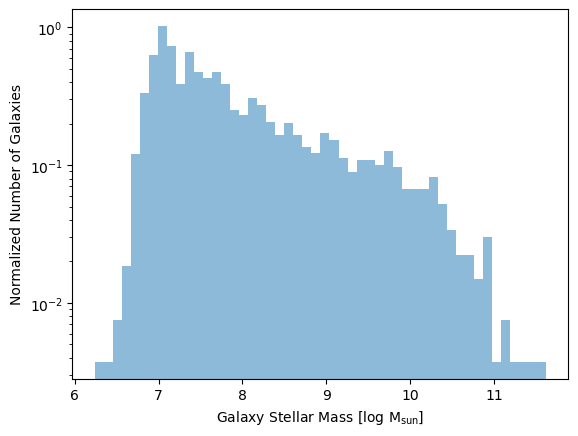

In [17]:

# Create a subplot
fig, ax = plt.subplots()

# Set labels and scale
ax.set_xlabel('Galaxy Stellar Mass [log M$_{\\rm sun}$]')
ax.set_ylabel('Normalized Number of Galaxies')

# Set y-axis to log scale
ax.set_yscale('log')

# Plot normalized histogram
ax.hist(mass_data_log, bins=50, density=True, alpha=0.5)
# Set limits on x and y axes

# Show the plot
plt.show()


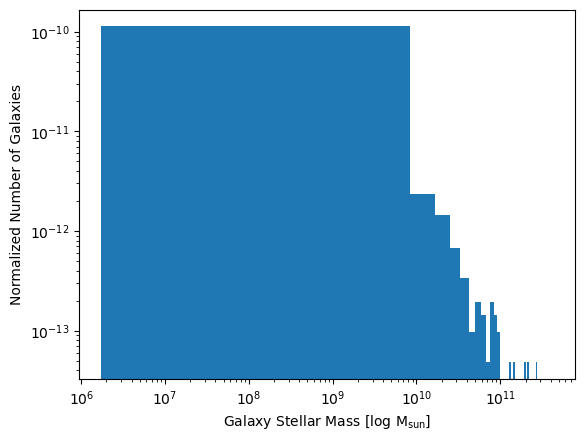

In [19]:

# Create a subplot
fig, ax = plt.subplots()

# Set labels and scale
ax.set_xlabel('Galaxy Stellar Mass [M$_{\\rm sun}$]')
ax.set_ylabel('Normalized Number of Galaxies')

# Set y-axis to log scale
ax.set_yscale('log')
ax.set_xscale('log')

# Plot normalized histogram
ax.hist(mass_data, bins=50, density=True, alpha=0.5)
# Set limits on x and y axes

# Show the plot
plt.show()


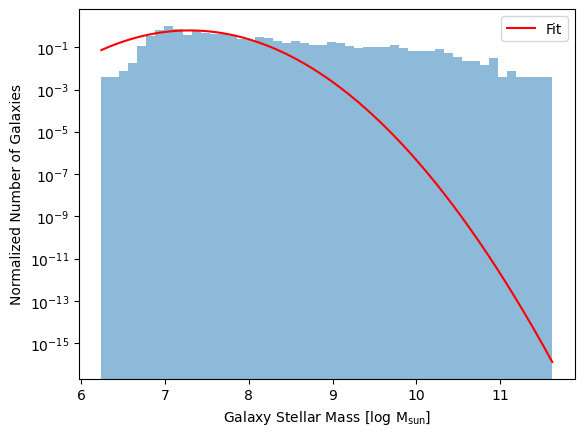

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming you have already loaded your data

# Create a subplot
fig, ax = plt.subplots()

# Set labels and scale
ax.set_xlabel('Galaxy Stellar Mass [log M$_{\\rm sun}$]')
ax.set_ylabel('Normalized Number of Galaxies')

# Set y-axis to log scale
ax.set_yscale('log')

# Plot normalized histogram
ax.hist(mass_data_log, bins=50, density=True, alpha=0.5)


# Define the function to fit (e.g., a Gaussian)
def fit_function(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Initial guess for the parameters
initial_guess = [1.0, np.mean(mass_data_log), np.std(mass_data_log)]

# Fit the curve to the data
params, covariance = curve_fit(fit_function, bin_edges[:-1], hist_values, p0=initial_guess)

# Generate x values for the curve
x_fit = np.linspace(min(bin_edges), max(bin_edges), 1000)

# Plot the fitted curve
ax.plot(x_fit, fit_function(x_fit, *params), 'r-', label='Fit')


# Show the plot with legend
ax.legend()
plt.show()


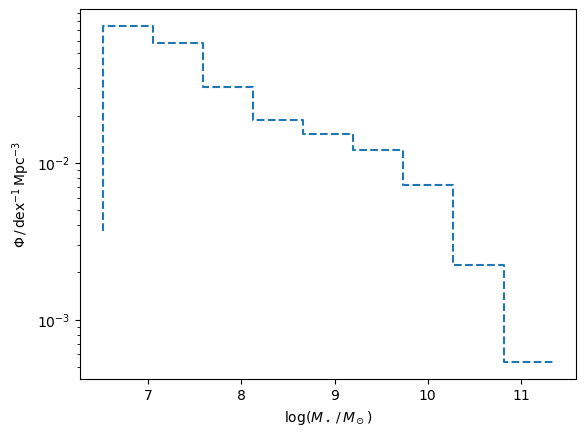

In [33]:
import numpy as np
import matplotlib.pyplot as plt

M     = mass_data         #Read stellar masses in Msun
logM  = np.log10(M)                     #Take logarithm
nbins = 10                              #Number of bins to divide data into
V     = Vcom                             #Survey volume in Mpc3
Phi,edg = np.histogram(logM,bins=nbins) #Unnormalized histogram and bin edges
dM    = edg[1] - edg[0]                 #Bin size
Max   = edg[0:-1] + dM/2.               #Mass axis
Phi   = Phi / V / dM                    #Normalize to volume and bin size

plt.clf()
plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi\,/\,\mathrm{dex}^{-1}\,\mathrm{Mpc}^{-3}$')
#plt.plot(Max,Phi,ls='steps-post')
plt.plot(Max,Phi, linestyle='--', drawstyle='steps')